# Quick guide on how to use RenderMan VSTi host library
## First, load your plugin.
It's important to note that dexed no longer support vst2 as of update 0.9.5.  
The library we use to send inputs to Dexed (RenderMan) is no longer supported and lack of compatibility with vst3 plugins.  
For thoses reasons we will use Dexed 0.9.4 vst2 plugin.

In [ ]:
import utils.librenderman as rm
import matplotlib.pyplot as plt

engine = rm.RenderEngine(48000,512,512)
path = "./VST/Dexed.dll" 
if(engine.load_plugin(path,0)):
    print("Loaded successfully")
print(engine.get_available_plugins_xml(path)) # Print the available plugins and their descriptions.

## Params
There is a large difference in parameters accessibility between vst2 and vst3 plugins of Dexed.  
With vst2 you have access to the same params that you can modify using the app.  
With vst3 you have access to all the CC of the plugin resulting in a total of more than 2000 params.  
I don't really know if this is due to the RenderMan library lack of compatibility with vst3 plugins or if this is attended.  
The problem is that you can corrupt very easily the parmeters of the plugin when you modify all the params.   
To display available params for the plugin use this:

In [ ]:
params = engine.get_plugin_parameters_description()
print(params)

## Then Instanciate de Patch Generator
The Patch Generator will provide random patchs for your current loaded plugin.  
It will also provide normalised patches if you've set the normalisers for your plugin.

In [ ]:
generator = rm.PatchGenerator(engine)

In [ ]:

# Get a random patch and set it.
new_patch = generator.get_random_patch()
engine.set_patch(new_patch)

## Handling Dexed
To use Dexed properly we need to override some parameters to prevent hanging notes.

In [ ]:
overriden_parameters = [(26, 1.),  (30, 0.),  (48, 1.),  (52, 0.), 
                        (70, 1.),  (74, 0.),  (92, 1.),  (96, 0.), 
                        (114, 1.), (118, 0.), (136, 1.), (140, 0.)]

# Loop through each tuple, unpack it and override the correct
# parameter with the correct value to prevent hanging notes.
for parameter in overriden_parameters:
    index, value = parameter
    engine.override_plugin_parameter(index, value)

In [ ]:

# Settings to play a note and extract data from the synth.
midiNote = 24
midiVelocity = 127
noteLength = 4.0
renderLength = 5.0

## RenderPatch
RenderPatch will take the random patch that was set before and convert the MIDI Input generated by the patch to audio output.  
This will change the parameters values and complete the audio frames.

In [ ]:

# Render the data. 
engine.render_patch(midiNote, midiVelocity, noteLength, renderLength)

In [ ]:
# Get the data. Note the audio is automattically made mono, no
# matter what channel size for ease of use.
audio = engine.get_audio_frames()
mfccs = engine.get_mfcc_frames()

## Display the audio

Text(0.5, 0, 'Time (frame count)')

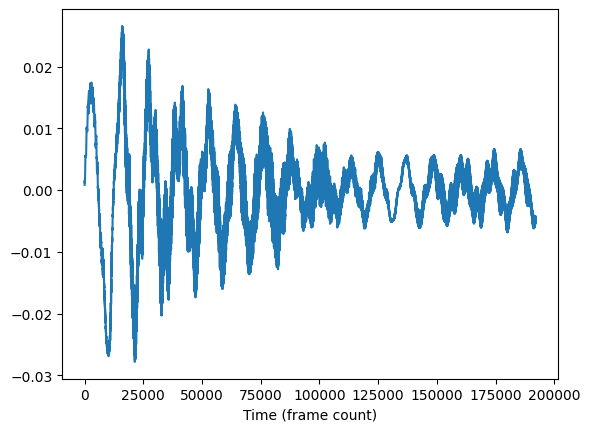

In [31]:

plt.plot(audio)
plt.xlabel('Time (frame count)')

## Some more exemples


In [ ]:
fig, axs = plt.subplots(2,2)

for i in range(2):
    for j in range(2):
        new_patch = generator.get_random_patch()
        engine.set_patch(new_patch)
        engine.render_patch(midiNote, midiVelocity, noteLength, noteLength)
        audio = engine.get_audio_frames()
        axs[i, j].plot(audio)


# Using the algorithms
## Hill climber
To use the hill climber algorithm, generate data then use the corressponding script.